# **Statistical Analyst Time Series Using Sunspot Data**
---
pada tahap ini kita akan melakukan preprocesing data lebih lanjut dengan menggunakan statistical analyst 

## **1.Statistical Analyst Using Sunspot Data**

### **1.1 Import Library**
---
pertama kita akan melakukan import library yang dibutuhkan untuk proses analisis statistik pada data sunspot

In [11]:
# import library yang dibutuhkan 
import numpy as np                              # import library untuk komputasi numerik 
import pandas as pd                             # import library untuk pengolahan datafrane 
import matplotlib.pyplot as plt                 # import library untuk visualisasi data dengan matplotlib 
import seaborn as sns                           # import library untuk visualisasi data dengan seaborn 
import os                                       # import library os untuk 
import statsmodels as sm

from warnings import simplefilter               # import library untuk handling error 
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import library untuk pengolahan statistik dalam bentuk visualisasi data
from statsmodels.tsa.arima_model import ARIMA                 # import library untuk pengolahan statistik dengan model ARIMA 
from dateutil.parser import parse                             # Libary untuk pengolahan dataframe time series 

# definisikan variabel untuk memfilter error yang ada 
simplefilter('ignore')
dateparse=lambda dates:parse(dates)

### **1.2 Load File CSV dengan library OS dan membaca file tersebut dengan pandas**
---
pada tahap ini kita akan melakukan load file yang sudah diolah sebelum nya pada kode exploration.ipynb dan menggunakan file tersebut untuk analisis lebih lanjut 

In [12]:
# Path ke folder
folder_path = "../data/raw"

# Menelusuri semua file di folder dan subfolder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".csv"):  # Menemukan file CSV
            file_path = os.path.join(root, file)
            print(f"File ditemukan: {file_path}")
            
            # Membaca file ke pandas
            df = pd.read_csv(file_path, parse_dates=['Date'], date_parser=dateparse)
            
            # Menampilkan 5 baris pertama
            print(df.head())


File ditemukan: ../data/raw\Sunspots.csv
   Unnamed: 0       Date  Monthly Mean Total Sunspot Number
0           0 1749-01-31                               96.7
1           1 1749-02-28                              104.3
2           2 1749-03-31                              116.7
3           3 1749-04-30                               92.8
4           4 1749-05-31                              141.7


In [13]:
df = df.drop(columns='Unnamed: 0', axis=True)
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [14]:
df = df.set_index('Date')
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


### **1.3 Sunspots Data**

In [15]:
# Membaca data dari file
dta = df

# Membuat indeks waktu berdasarkan range tahun menggunakan pandas
date_range = pd.date_range(start="1700", end="2008", periods=len(dta))
dta.index = date_range
dta.index.freq = pd.infer_freq(dta.index)

# Menghapus kolom "YEAR" jika ada
if "YEAR" in dta.columns:
    del dta["YEAR"]

<Axes: >

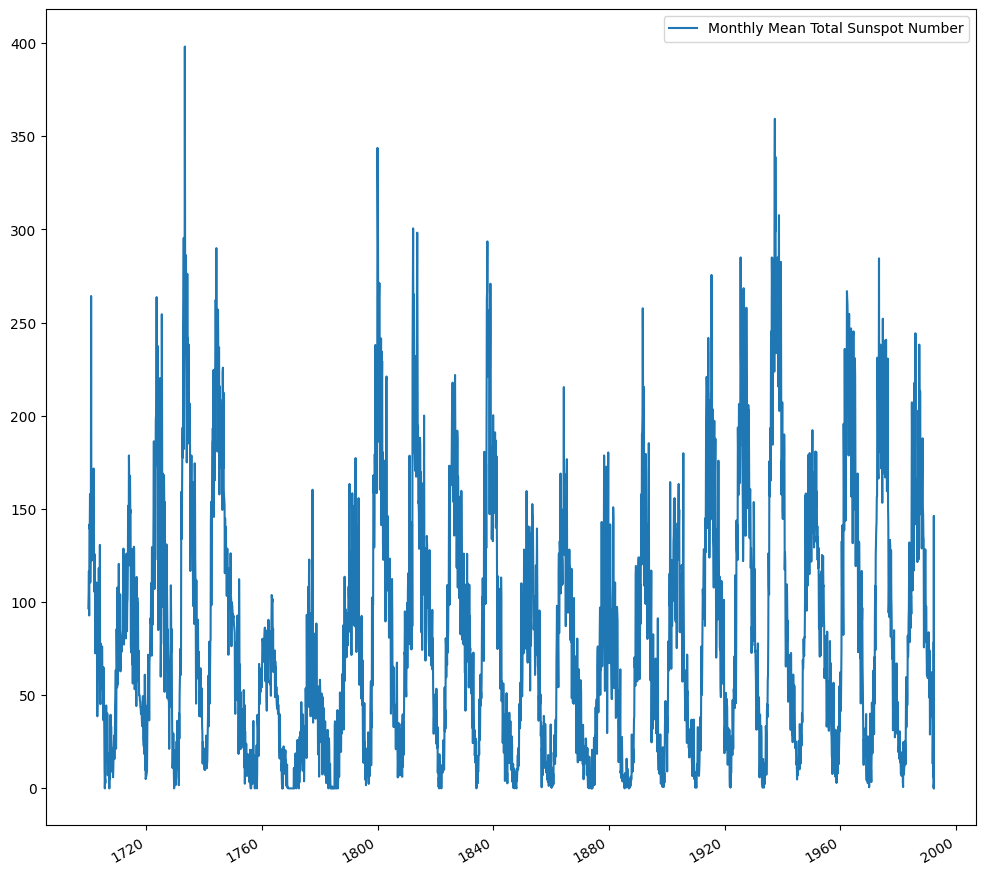

In [16]:
dta.plot(figsize=(12, 12))

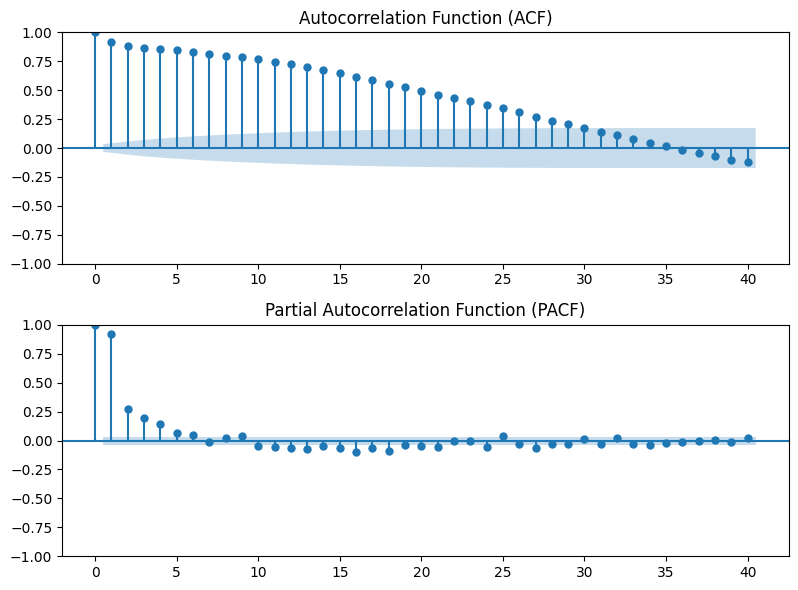

In [17]:
# Membuat plot ACF dan PACF
fig = plt.figure(figsize=(8, 6))

# Plot ACF
ax1 = fig.add_subplot(211)
plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax1.set_title("Autocorrelation Function (ACF)")

# Plot PACF
ax2 = fig.add_subplot(212)
plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)
ax2.set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Misalnya, kita ingin membuat model ARIMA dengan urutan (2, 0, 0)
arma_mod20 = ARIMA(dta, order=(2, 0, 0)).fit()

# Menampilkan parameter model yang telah dilatih
print(arma_mod20.params)


const      82.070484
ar.L1       0.667000
ar.L2       0.273224
sigma2    671.166050
dtype: float64


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load dataset
data = pd.read_csv('../data/raw/Sunspots.csv', parse_dates=['Date'], index_col='Date')

# Tampilkan beberapa baris pertama untuk melihat struktur data
print(data.head())


            Unnamed: 0  Monthly Mean Total Sunspot Number
Date                                                     
1749-01-31           0                               96.7
1749-02-28           1                              104.3
1749-03-31           2                              116.7
1749-04-30           3                               92.8
1749-05-31           4                              141.7


In [20]:
data = data.drop(columns='Unnamed: 0', axis=True)
data.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


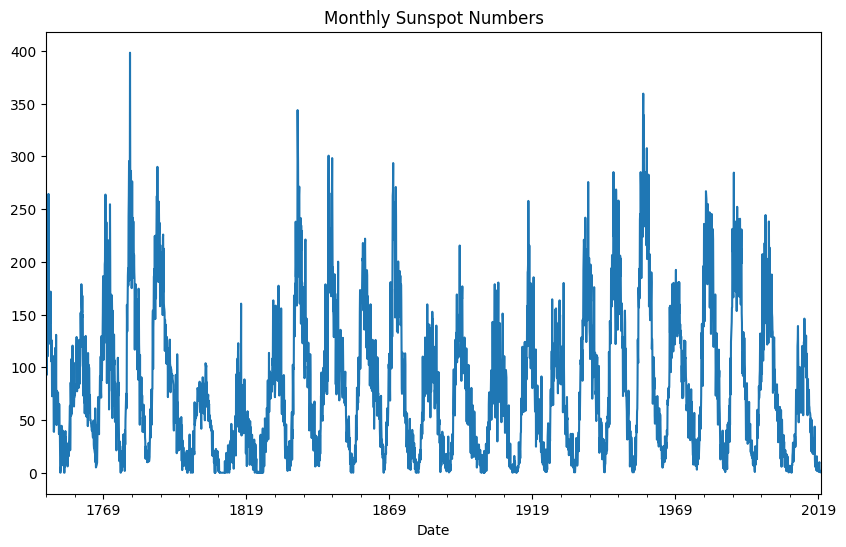

In [21]:
sunspots = data['Monthly Mean Total Sunspot Number']

# Plot data Sunspots
sunspots.plot(figsize=(10, 6))
plt.title('Monthly Sunspot Numbers')
plt.show()

In [22]:
result = adfuller(sunspots.dropna())  # Pastikan tidak ada nilai NaN
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] > 0.05:
    print("Data tidak stasioner, perlu differencing")
    # Jika p-value > 0.05, kita dapat mencoba differencing
    sunspots_diff = sunspots.diff().dropna()
    sunspots_diff.plot(figsize=(10, 6))
    plt.title('Differenced Sunspots')
    plt.show()


ADF Statistic: -10.480868432669846
p-value: 1.214714158650459e-18


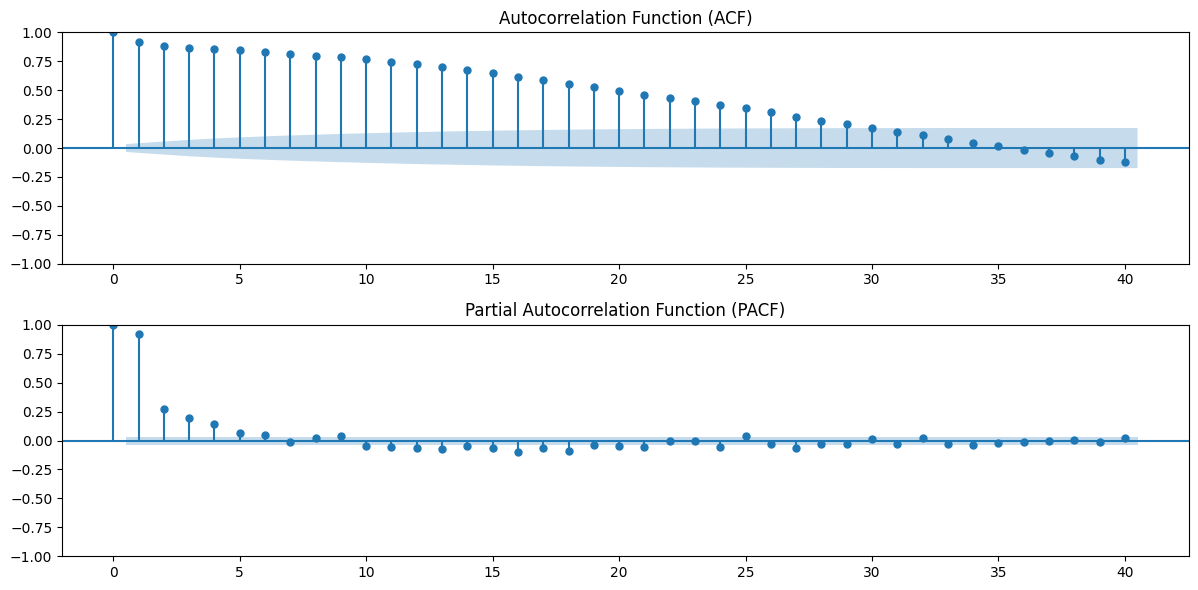

In [23]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Plot ACF
plot_acf(data.values.squeeze(), lags=40, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# Plot PACF
plot_pacf(data.values.squeeze(), lags=40, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

# Adjust layout
plt.tight_layout()
plt.show()

In [24]:
arima_mod20 = ARIMA(data, order=(2,0,0)).fit()
print(arima_mod20.params)

const      82.070484
ar.L1       0.667000
ar.L2       0.273224
sigma2    671.166050
dtype: float64


In [25]:
arima_mod30 = ARIMA(data, order=(3,0,0)).fit()

In [26]:
print(arima_mod20.aic, arima_mod20.bic, arima_mod30.hqic)

30404.770864851173 30429.118966733844 30295.711460504703


In [32]:
from statsmodels.stats.stattools import durbin_watson 

# Gunakan resid dari model ARIMA
dw_stat = durbin_watson(arima_mod30.resid.values)
print(f"Durbin-Watson statistic: {dw_stat}")

Durbin-Watson statistic: 2.053501805648196


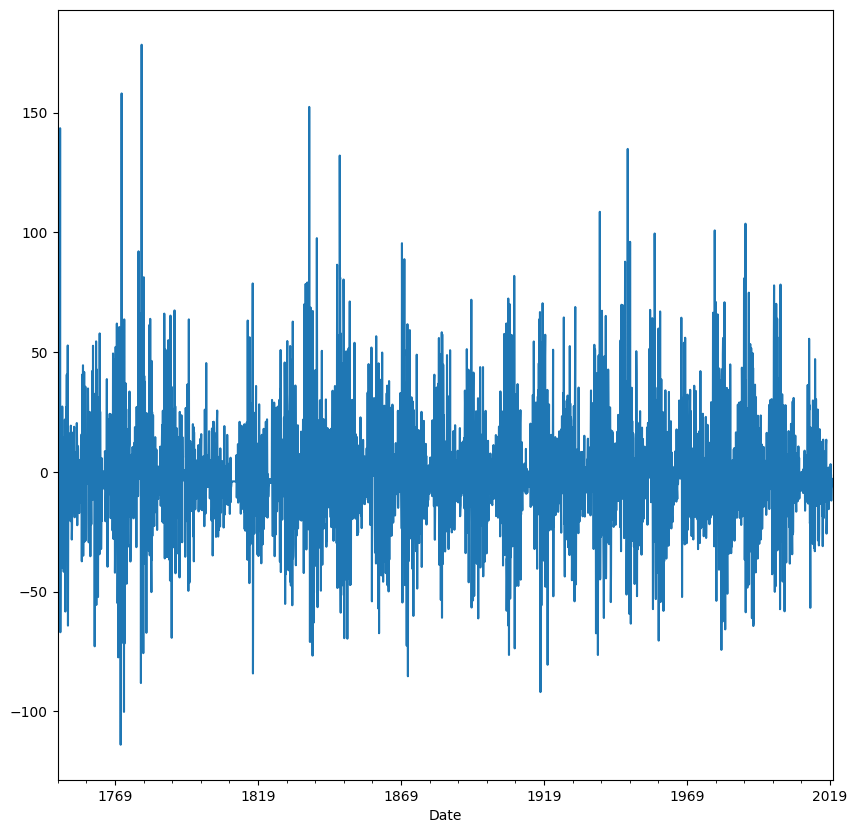

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax = arima_mod30.resid.plot(ax=ax)